# Transmission spectra: full

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/ngr81uubrouo8nk/AACrisaNEnLdxDwwosdX1Edva?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Finish set-up

In [3]:
# Link dirs
! ln -srf data/detrended_binned_lcs data/tspec_full

## Load

In [3]:
base_dir = "data/tspec_full/out_l/WASP50"

nights = {
    "Transit 1": "131219",
    "Transit 2": "150927",
    "Transit 3": "161211",
}

data_dict = {
    transit: {
        "tspec": pd.read_csv(
            f"{base_dir}/w50_{ut_date}/transpec.csv"
        )[["Wav_d", "Wav_u", "Depth (ppm)", "Depthup (ppm)", "DepthDown (ppm)"]],
        
        "results": pd.read_table(
            f"{base_dir}/w50_{ut_date}/white-light/results.dat",
            sep = "\s+",
            comment = '#',
            index_col = "Variable",
        ),
    }
   for (transit, ut_date) in nights.items()
}

## Plot

depths [19297.9905396  18989.31318059 18742.30359658]
19009.869105587633
offsets: [ 322.4120209    13.73466189 -233.27492212]
offsets (% mean wlc depth): [ 1.69908928  0.07238073 -1.22934287]
[[ 322.4120209 ]
 [  13.73466189]
 [-233.27492212]]
Mean depth unc (ppm): 301.75350068850076
Median depth unc (ppm) 305.18883507252684

Saving tspecs to: data/tspec_full/out_l/WASP50/tspecs.csv
mean WLC depth: 18975.57851870111 194.1731681948111
Rp (Rj): 1.5442391137448968 jupiterRad
Rs (Rsun): 1.152 solRad
gp (m/s^2): 1995.6651770810302 cm / s2


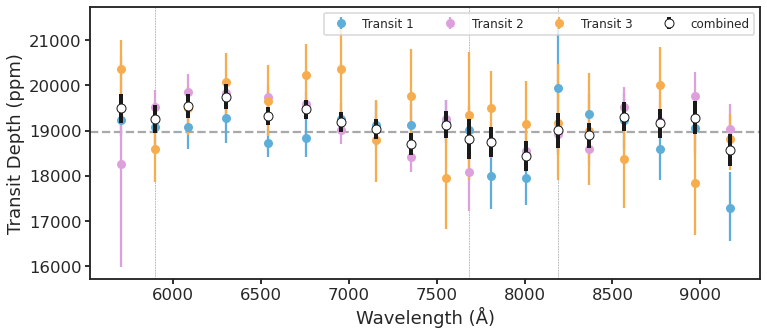

In [8]:
fig, ax = plt.subplots(figsize=FIG_WIDE)

utils.plot_tspec_IMACS(ax, base_dir, data_dict)

# Save
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)
#utils.savefig(f"../paper/figures/tspec_full/tspec_full.pdf")
#utils.savefig("/home/mango/Desktop/tspecs.png", dpi=250)

## Table

In [9]:
x = [2 ± 3, 4 ± 5, 7 ± 3]

SyntaxError: invalid character '±' (U+00B1) (<ipython-input-9-6274cfa98c96>, line 1)

In [14]:
np.average([2, 4, 7], weights=[3, 5, 3])

4.2727272727272725

In [5]:
tspecs = pd.read_csv(f"{base_dir}/tspecs.csv", comment='#')
tspecs#.to_clipboard(index=False)

,Wavelength (Å),Transit 1,Transit 2,Transit 3,Combined
0,5600.0 - 5800.0,19200^{+400}_{-400},18300^{+2400}_{-2300},20400^{+600}_{-700},19494 \pm 317
1,5800.0 - 5985.8,19100^{+500}_{-600},19500^{+400}_{-400},18600^{+700}_{-700},19254 \pm 303
2,5985.8 - 6185.8,19100^{+500}_{-500},19800^{+400}_{-400},19500^{+500}_{-600},19543 \pm 273
3,6185.0 - 6420.0,19300^{+600}_{-500},19800^{+300}_{-400},20100^{+600}_{-700},19754 \pm 273
4,6420.0 - 6655.0,18700^{+300}_{-300},19700^{+200}_{-300},19700^{+800}_{-800},19329 \pm 203
5,6655.0 - 6855.0,18800^{+500}_{-400},19600^{+300}_{-300},20200^{+700}_{-800},19469 \pm 220
6,6855.0 - 7055.0,19300^{+300}_{-300},19000^{+300}_{-300},20400^{+1000}_{-1000},19190 \pm 218
7,7055.0 - 7255.0,19100^{+500}_{-500},19000^{+300}_{-300},18800^{+900}_{-900},19042 \pm 227
8,7255.0 - 7455.0,19100^{+500}_{-500},18400^{+300}_{-300},19800^{+1100}_{-1000},18707 \pm 249
9,7455.0 - 7655.0,19200^{+500}_{-500},19200^{+400}_{-400},18000^{+1100}_{-1100},19133 \pm 305
